In [48]:
import extract
import utils
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from model import EmotionModel

In [49]:
# load hyper_param
hyper_param = extract.extract_hyper_param("./model/hyper_param.json")

In [50]:
# initilize the model with hyper param
model = EmotionModel(**hyper_param)

### Load Data For Different Data set

In [51]:
# label_dict = extract.extract_mapping("./data/mapping.txt")
# label_map  = utils.get_label_map(label_dict)

    
# train_x ,y = extract.extract_content_labels("./data/train")

    
# model.init_tokenizer(train_x)

# train_x = model.tokenize_sequences(train_x)

# train_y = []
# for emotion in y:
#     train_y.append(utils.get_one_hot_encoded_array_for_label(emotion,label_dict,label_map))

# train_y = np.array(train_y)

# val_x ,y = extract.extract_content_labels("./data/val")
# val_x = model.tokenize_sequences(val_x)

# val_y = []
# for emotion in y:
#     val_y.append(utils.get_one_hot_encoded_array_for_label(emotion,label_dict,label_map))

# val_y = np.array(val_y)

# test_x ,y = extract.extract_content_labels("./data/test")
# test_x = model.tokenize_sequences(test_x)

# test_y = []
# for emotion in y:
#     test_y.append(utils.get_one_hot_encoded_array_for_label(emotion,label_dict,label_map))

# test_y = np.array(test_y)


## Loading data from the dataset

In [52]:
label_map = extract.load_label_map('./data/text_emotion.csv')

X, y = extract.load_data_set('./data/text_emotion.csv')

# init tokenizer using whole dataset
model.init_tokenizer(X)
    
# split the dataset into 80% training, 10% validation and 10% testing
_80 = int(len(X)*.8)
_10 = int(len(X)*.1)

train_x = X[:_80]
tr_y = y[:_80]

val_x = X[_80:_80 + _10]
v_y = y[_80:_80 + _10]

test_x = X[_80 + _10:]
t_y = y[_80 + _10:]

### Tokenize the sentence

In [53]:
# tokenize the sentences
train_x = model.tokenize_sequences(train_x)
val_x = model.tokenize_sequences(val_x)
test_x = model.tokenize_sequences(test_x)

### Creating One hot vector for each label

In [54]:
# create one hot vectors for the labels.
train_y = []
for emotion in tr_y:
    train_y.append(utils.get_one_hot_encoded_array(emotion,label_map))
train_y = np.array(train_y)

val_y = []
for emotion in v_y:
    val_y.append(utils.get_one_hot_encoded_array(emotion,label_map))
val_y = np.array(val_y)

test_y = []
for emotion in t_y:
    test_y.append(utils.get_one_hot_encoded_array(emotion,label_map))
test_y = np.array(test_y)

### Seting up the model

In [55]:
#set up the model
model.model_setup()

AttributeError: 'EmotionModel' object has no attribute 'model_setup'

### Training the model

In [27]:
# Train the model
history = model.train(train_x,train_y,(val_x,val_y),num_epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 13)                845       
Total params: 830,477
Trainable params: 830,477
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: 

### Test the Model

In [17]:
# Test Results
results = model.test(test_x,test_y)

125/125 [==============================] - 4s 30ms/step - loss: 1.9542 - accuracy: 0.3478


### Plot and Show the Reuslts

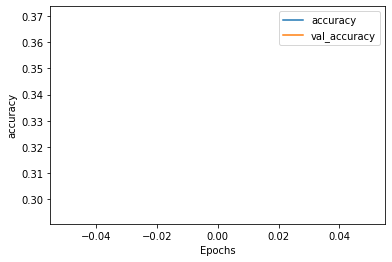

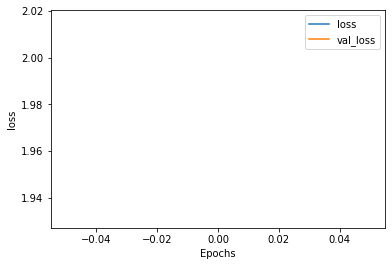

test loss, test acc: [1.9541542530059814, 0.3477500081062317]


In [18]:
# Plot Training results
model.plot_graphs(history,"accuracy")
model.plot_graphs(history,"loss")

print("test loss, test acc:", results)

### Save the model 

In [ ]:
# model.model.save('./model/my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')
# # print(pad)